# Results of the Experiments

This notebook contains the results of the models, followed by a section to test the models yourself.

## SNLI Results

This section contains the accuracy scores of the pre-trained models on the SNLI task.

In [1]:
# import required packages
import torch
import pytorch_lightning as pl
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import spacy
tokenizer = spacy.load("en")

# import required code files
from dataset.LoadData import *
from main import *

In [2]:
# load the test dataset
vocab, label_vocab, _, _, test_iter = load_snli(device=None, batch_size=64, return_label_vocab=True)

In [10]:
# function that tests a model and returns the confusion matrix
def evaluate_model(model, test_dataloader):
    all_predicted_labels = []
    all_real_labels = []
    for batch_index, batch in enumerate(test_dataloader):
        # get the sentence lengths of the batch
        lengths_premises = torch.tensor([x[x!=1].shape[0] for x in batch.premise], device=model.device)
        lengths_hypothesis = torch.tensor([x[x!=1].shape[0] for x in batch.hypothesis], device=model.device)

        # pass premises and hypothesis through the embeddings
        premises = model.glove_embeddings(batch.premise.to(model.device))
        hypothesis = model.glove_embeddings(batch.hypothesis.to(model.device))

        # forward the premises and hypothesis through the Encoder
        premises = model.encoder(premises, lengths_premises)
        hypothesis = model.encoder(hypothesis, lengths_hypothesis)

        # calculate the difference and multiplication
        difference = torch.abs(premises - hypothesis)
        multiplication = premises * hypothesis

        # create the sentence representations
        sentence_representations = torch.cat([premises, hypothesis, difference, multiplication], dim=1)

        # pass through the classifier
        predictions = model.classifier(sentence_representations)

        # get the predicted labels and real labels
        predicted_labels = torch.argmax(predictions, dim=1)
        real_labels = batch.label
        
        # add to the lists
        all_predicted_labels.append(predicted_labels)
        all_real_labels.append(real_labels)
    # cat the labels
    all_predicted_labels = torch.cat(all_predicted_labels, dim=0)
    all_real_labels = torch.cat(all_real_labels, dim=0)
    
    # calculate the confusion matrix
    confusion_matrix = sklearn.metrics.confusion_matrix(all_real_labels.cpu().detach().numpy(),
                                                        all_predicted_labels.cpu().detach().numpy())
    print('Confusion matrix:')
    print(confusion_matrix)
    print('Columns are actual labels and rows are predicted labels')
    print('Labels:')
    print([label_vocab.itos[x] for x in [0, 1, 2]])

### AWE Model 

This subsection contains the results of the AWE on the SNLI task.

In [17]:
# create a PyTorch Lightning trainer
trainer = pl.Trainer(logger=False,
                     checkpoint_callback=False,
                     gpus=1 if torch.cuda.is_available() else 0,
                     progress_bar_refresh_rate=1)

# load the AWE model from the given checkpoint
model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/awe/checkpoints/epoch=10.ckpt')

# test the model
model.freeze()
test_result = trainer.test(model, test_dataloaders=test_iter, verbose=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.6793, device='cuda:0'),
 'test_loss': tensor(0.7365, device='cuda:0')}
--------------------------------------------------------------------------------



In [18]:
# evaluate the model for confusion matrix
evaluate_model(model, test_iter)

Confusion matrix:
[[2521  362  485]
 [ 546 2175  516]
 [ 574  668 1977]]
Columns are actual labels and rows are predicted labels
Labels:
['entailment', 'contradiction', 'neutral']


### UniLSTM Model 

This subsection contains the results of the unidirectional LSTM on the SNLI task.

In [19]:
# create a PyTorch Lightning trainer
trainer = pl.Trainer(logger=False,
                     checkpoint_callback=False,
                     gpus=1 if torch.cuda.is_available() else 0,
                     progress_bar_refresh_rate=1)

# load the UniLSTM model from the given checkpoint
model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/unilstm/checkpoints/epoch=11.ckpt')

# test the model
model.freeze()
test_result = trainer.test(model, test_dataloaders=test_iter, verbose=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.7971, device='cuda:0'),
 'test_loss': tensor(0.5171, device='cuda:0')}
--------------------------------------------------------------------------------



In [20]:
# evaluate the model for confusion matrix
evaluate_model(model, test_iter)

Confusion matrix:
[[2886  126  356]
 [ 273 2567  397]
 [ 489  352 2378]]
Columns are actual labels and rows are predicted labels
Labels:
['entailment', 'contradiction', 'neutral']


### BiLSTM Model 

This subsection contains the results of the bidirectional LSTM on the SNLI task.

In [13]:
# create a PyTorch Lightning trainer
trainer = pl.Trainer(logger=False,
                     checkpoint_callback=False,
                     gpus=1 if torch.cuda.is_available() else 0,
                     progress_bar_refresh_rate=1)

# load the BiLSTM model from the given checkpoint
model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/bilstm/checkpoints/epoch=13.ckpt')

# test the model
model.freeze()
test_result = trainer.test(model, test_dataloaders=test_iter, verbose=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.7978, device='cuda:0'),
 'test_loss': tensor(0.5474, device='cuda:0')}
--------------------------------------------------------------------------------



In [14]:
# evaluate the model for confusion matrix
evaluate_model(model, test_iter)

Confusion matrix:
[[2789  201  378]
 [ 210 2683  344]
 [ 457  396 2366]]
Columns are actual labels and rows are predicted labels
Labels:
['entailment', 'contradiction', 'neutral']


### BiLSTMMax Model 

This subsection contains the results of the bidirectional LSTM with max pooling on the SNLI task.

In [15]:
# create a PyTorch Lightning trainer
trainer = pl.Trainer(logger=False,
                     checkpoint_callback=False,
                     gpus=1 if torch.cuda.is_available() else 0,
                     progress_bar_refresh_rate=1)

# load the BiLSTMMax model from the given checkpoint
model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/bilstmmax/checkpoints/epoch=7.ckpt')

# test the model
model.freeze()
test_result = trainer.test(model, test_dataloaders=test_iter, verbose=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.8385, device='cuda:0'),
 'test_loss': tensor(0.6197, device='cuda:0')}
--------------------------------------------------------------------------------



In [16]:
# evaluate the model for confusion matrix
evaluate_model(model, test_iter)

Confusion matrix:
[[2976  100  292]
 [ 159 2784  294]
 [ 414  328 2477]]
Columns are actual labels and rows are predicted labels
Labels:
['entailment', 'contradiction', 'neutral']


### Training Results

This section summarizes the results from training in the following table.

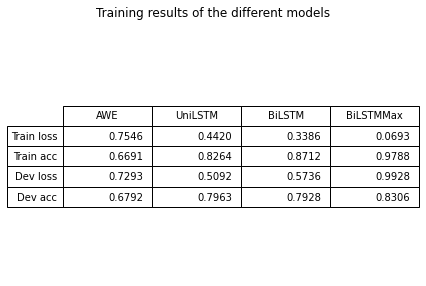

In [45]:
title_text = 'Training results of the different models'
data =  [
            [         'AWE', 'UniLSTM', 'BiLSTM', 'BiLSTMMax'],
            [ 'Train loss',  0.7546, 0.4420,   0.3386,  0.0693],
            ['Train acc',  0.6691, 0.8264,   0.8712,   0.9788],
            ['Dev loss',  0.7293,  0.5092,  0.5736,  0.9928],
            ['Dev acc',  0.6792,  0.7963,  0.7928,  0.8306],
        ]
# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]
# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []
for row in data:
    cell_text.append([f'{x:.4f}' for x in row])
# Create the figure. Setting a small pad on tight_layout
# seems to better regulate white space. Sometimes experimenting
# with an explicit figsize here can produce better outcome.
plt.figure(linewidth=2, tight_layout={'pad':1})
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')
# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 1.5)
# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Hide axes border
plt.box(on=None)
# Add title
plt.suptitle(title_text)
# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()

## Conclusion

This section provides a small conclusion on the results of the SNLI task.

We see that the Average Word Embedding (AWE) model already performs significantly better than random guessing (about 33% accuracy for random guessing) with a test accuracy of around 67%. This means that such a simple model is already able to capture some form of semantic entailment/contradiction. When we look at the confusion matirx, the model does not make any clear mistakes. However, most mistakes are instances where the model predicts 'neutral' but the real label is 'entailment' or 'contradiction'.

When moving to a unidirectional LSTM (UniLSTM) model, we see a significant boost in performance. The test accuracy increases by over 20% points to around 79%. This seems to indicate that the unidirectional LSTM is much better at capturing semantic entailment/contradiction. This can be attributed to the fact that an LSTM is not a simple combination of the word embeddings but uses a history of words and hidden states to create a complex combination of the word embeddings that takes word order into account. When we look at the confusion matrix, we see that the number of errors has significantly decreased. However, we still see the same trend as with the AWE model. Most mistakes are instances where the model predicts 'neutral' but the real label is 'entailment' or 'contradiction'.

Interestingly, when upgrading to a bidirectional LSTM that uses the last hidden states of the forward and backward passes concatenated as the sentence representations(BiLSTM) we see no improvement in dev and test accuracy. However, we do see an increase in training performance with about 5% points. This seems to indicate that these hidden states are no better representation of the sentences than the UniLSTM representations. When we look at the confusion matrix, the same trend persists again. Most mistakes are instances where the model predicts 'neutral' but the real label is 'entailment' or 'contradiction'.

Lastly, when we upgrade to the bidirectional LSTM that uses max-pooling over the word representations (BiLSTMMax), we see another improvement in test accuracy by about 3-4% compared to the UniLSTM and BiLSTM models. Interesting to note here is that the training accuracy is very high at around 98% which is significantly better than the dev and test accuracy at around 83%. This indicates that the model is overfitting on the training data, which results in a more poor generalization. When we look at the confusion matrix, the trend becomes even clearer. The vast majority of mistakes comes from instances where the model predicts 'neutral' but the real label is 'entailment' or 'contradiction'.

In conclusion, the bidirectional LSTM that uses max-pooling over the word representations (BiLSTMMax) is the best model with around 83% test accuracy on the SNLI task. However, this model is prone to overfitting. All models show a trend where most mistakes are made when the model predicts 'neutral' but the real label is 'entailment' or 'contradiction'. This seems to indicate that the model struggles with the 'neutral' scenarios and tends to have some bias to assigning instances to this class.

## SentEval Results

This section contains the scores of the pre-trained models on the SentEval task.

In [4]:
# function to print a table of SentEval results
def print_senteval(model_name, results):
    title_text = 'SentEval results of the ' + model_name + ' model'
    # Get the data from the results
    column_headers = []
    dev_acc = []
    acc = []
    for task in results:
        # Add the column header
        column_headers.append(task)
        # Add the accuracy and dev accuracy
        task_content = results[task]
        if 'devacc' in task_content:
            this_dev_acc = task_content['devacc']
            dev_acc.append(f'{this_dev_acc:.1f}')
        elif 'devpearson' in task_content:
            this_dev_pearson = task_content['devpearson']
            dev_acc.append(f'{this_dev_pearson:.3f}')
        else:
            dev_acc.append('-')
        if 'acc' in task_content:
            if task == 'MRPC':
                this_acc = task_content['acc']
                this_f1 = task_content['f1']
                acc.append(f'{this_acc:.1f}' + '/' + f'{this_f1:.1f}')
            else:
                this_acc = task_content['acc']
                acc.append(f'{this_acc:.1f}')
        elif 'pearson' in task_content:
            this_pearson = task_content['pearson']
            acc.append(f'{this_pearson:.3f}')
        elif 'all' in task_content:
            this_pearson_mean = task_content['all']['pearson']['mean']
            this_pearson_wmean = task_content['all']['pearson']['wmean']
            acc.append(f'{this_pearson_mean:.2f}' + '/' + f'{this_pearson_wmean:.2f}')
        else:
            acc.append('-')
    row_headers = ['Dev', 'Test']
    
    plt.figure(linewidth=2, tight_layout={'pad':1})
    the_table = plt.table(cellText=[dev_acc, acc],
                          rowLabels=row_headers,
                          rowLoc='right',
                          colLabels=column_headers,
                          loc='center')
    the_table.scale(1, 1.5)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    plt.suptitle(title_text)
    plt.rcParams['figure.figsize'] = [20, 4]
    plt.rcParams['figure.dpi'] = 1000
    plt.draw()

### AWE Model 

This subsection contains the results of the AWE on SentEval.

In [5]:
# load the results
senteval_results = torch.load('senteval_outputs/AWESentEvalResults.pt')

# print the results as a table
print_senteval('AWE', senteval_results)

### UniLSTM Model 

This subsection contains the results of the unidirectional LSTM on SentEval.

In [6]:
# load the results
senteval_results = torch.load('senteval_outputs/UniLSTMSentEvalResults.pt')

# print the results as a table
print_senteval('UniLSTM', senteval_results)

### BiLSTM Model 

This subsection contains the results of the bidirectional LSTM on SentEval.

In [7]:
# load the results
senteval_results = torch.load('senteval_outputs/BiLSTMSentEvalResults.pt')

# print the results as a table
print_senteval('BiLSTM', senteval_results)

### BiLSTMMax Model 

This subsection contains the results of the bidirectional LSTM with max pooling on SentEval

In [8]:
# load the results
senteval_results = torch.load('senteval_outputs/BiLSTMMaxSentEvalResults.pt')

# print the results as a table
print_senteval('BiLSTM', senteval_results)

## Conclusion

This section provides a small conclusion on the results of SentEval.

From the results we clearly see that the BiLSTM model with max pooling is the best model across all tasks. This seems to indicate that the sentence representations of this model are the best for transfering to other tasks. 

Interestingly, we see that 4 tasks (MR, SickRelatedness, SickEntailment, and STS14) increase in performance when the model becomes complexer. While on the other hand the 6 other tasks (CR, SUBJ, MPQA, SST2, TREC, MRPC) show no relation or a negative relation with model complexity on the AWE, UniLSTM, and BiLSTM models. This seems to suggest that higher model complexity does not necessarily mean better performance when transfering to other tasks. 

To conclude, the BiLSTM model with max pooling is the best model across all tasks. For the other models, performance on 4 tasks shows a positive relation with model complexity while the other 6 tasks show no relation or a negative relation.

## Qualitative Analysis

This section tests a few hypothesis and premises with different levels of difficulty:
<ol>
    <li><b>Premise:</b> Two women are holding coffee cups. <b>Hypothesis:</b> Two women are holding water bottles. <b>Gold label:</b> Contradiction</li>
    <li><b>Premise:</b> Two women are holding to go packages. <b>Hypothesis:</b> Two women are empty handed. <b>Gold label:</b> Contradiction</li>
    <li><b>Premise:</b> Two women are wearing skirts. <b>Hypothesis:</b> One of the women is wearing pants. <b>Gold label:</b> Contradiction</li>
    <li><b>Premise:</b> Two women are holding coffee cups. <b>Hypothesis:</b> Two women are holding something. <b>Gold label:</b> Entailment</li>
    <li><b>Premise:</b> Two women are holding to go packages. <b>Hypothesis:</b> Two women just bought food. <b>Gold label:</b> Entailment</li>
    <li><b>Premise:</b> Two women are wearing skirts. <b>Hypothesis:</b> One of the women is wearing a skirt. <b>Gold label:</b> Entailment</li>
    <li><b>Premise:</b> Two women are holding coffee cups. <b>Hypothesis:</b> The women know each other. <b>Gold label:</b> Neutral</li>
    <li><b>Premise:</b> Two women are holding to go packages. <b>Hypothesis:</b> One woman is older than the other. <b>Gold label:</b> Neutral</li>
    <li><b>Premise:</b> Two women are wearing skirts. <b>Hypothesis:</b> The skirts are yellow. <b>Gold label:</b> Neutral</li>
</ol>

In [3]:
# function to tokenize the input string
def tokenize(vocab, sentence):
    sentence = tokenizer(sentence)
    token_list = []
    for token in sentence:
        token = token.text.lower()
        token_list.append(vocab[token])
    return torch.tensor(token_list)

In [4]:
# function to predict the label using a model
def predict_label(model_name, model, premise, hypothesis):
    # tokenize the premise and hypothesis
    premise = tokenize(vocab.stoi, premise).unsqueeze(dim=0)
    hypothesis = tokenize(vocab.stoi, hypothesis).unsqueeze(dim=0)

    # get the lengths
    premise_length = torch.tensor([premise.shape[1]])
    hypothesis_length = torch.tensor([hypothesis.shape[1]])

    # forward through the embedding
    premise = model.glove_embeddings(premise)
    hypothesis = model.glove_embeddings(hypothesis)

    # forward the premises and hypothesis through the Encoder
    premise = model.encoder(premise, premise_length)
    hypothesis = model.encoder(hypothesis, hypothesis_length)
    
    # calculate the difference and multiplication
    difference = torch.abs(premise - hypothesis)
    multiplication = premise * hypothesis

    # create the sentence representations
    sentence_representations = torch.cat([premise, hypothesis, difference, multiplication], dim=1)

    # pass through the classifier
    predictions = model.classifier(sentence_representations)

    # get the predicted label
    predicted_label = torch.argmax(predictions, dim=1)
    predicted_label = label_vocab.itos[predicted_label]
    
    # return the predicted label
    return predicted_label

In [5]:
# function that tests all models
def test_all_models(premise, hypothesis):
    # predict the AWE model
    model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/awe/checkpoints/epoch=10.ckpt')
    awe_label = predict_label('AWE', model, premise, hypothesis)
    
    # predict the UniLSTM model
    model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/unilstm/checkpoints/epoch=11.ckpt')
    unilstm_label = predict_label('UniLSTM', model, premise, hypothesis)
    
    # predict the BiLSTM model
    model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/bilstm/checkpoints/epoch=13.ckpt')
    bilstm_label = predict_label('BiLSTM', model, premise, hypothesis)
    
    # predict the BiLSTMMax model
    model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/bilstmmax/checkpoints/epoch=7.ckpt')
    bilstmmax_label = predict_label('BiLSTMMax', model, premise, hypothesis)
    
    # return the predicted labels
    return awe_label, unilstm_label, bilstm_label, bilstmmax_label

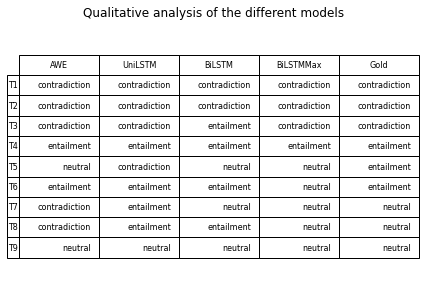

In [10]:
# create a list of the premises and hypothesis 
test_instances = [('Two women are holding coffee cups.', 'Two women are holding water bottles.', 'contradiction'),
                  ('Two women are holding to go packages.', 'Two women are empty handed.', 'contradiction'), 
                  ('Two women are wearing skirts.', 'One of the women is wearing pants.', 'contradiction'),
                  ('Two women are holding coffee cups.', 'Two women are holding something.', 'entailment'),
                  ('Two women are holding to go packages.', 'Two women just bought food.', 'entailment'),
                  ('Two women are wearing skirts.', 'One of the women is wearing a skirt.', 'entailment'),
                  ('Two women are holding coffee cups.', 'The women know each other.', 'neutral'),
                  ('Two women are holding to go packages.', 'One woman is older than the other.', 'neutral'),
                  ('Two women are wearing skirts.', 'The skirts are yellow.', 'neutral')]

# loop over the test instances
cell_text = []
for instance in test_instances:
    # test all models
    awe_label, unilstm_label, bilstm_label, bilstmmax_label = test_all_models(instance[0], instance[1])
    cell_text.append([awe_label, unilstm_label, bilstm_label, bilstmmax_label, instance[2]])
    
title_text = 'Qualitative analysis of the different models'
column_headers = ['AWE', 'UniLSTM', 'BiLSTM', 'BiLSTMMax', 'Gold']
row_headers = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

plt.figure(linewidth=2, tight_layout={'pad':1})
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')
the_table.scale(1, 1.5)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle(title_text)
plt.rcParams['figure.figsize'] = [20, 4]
plt.rcParams['figure.dpi'] = 1000
plt.draw()

## Conclusion

This section provides a small conclusion on the qualitative analysis of the models.

Overall, all models seem to be doing very well for contradictions. Even the harder contradiction (T3) did not fool most of the models, with exception of the BiLSTM model.

In terms of entailments, we see a very mixed bag. All models struggle with T5. This seems to indicate that the model does not know that to go packages are food. This is quite a hard instance to classify, so it was expected that some models would struggle. However, even the best model (BiLSTMMax) failed on this instance. Interestingly, the BiLSTMMax model also fails on T6 while the other models correctly classified it as 'entailment'. This seems to be caused by the trend that we have seen across all models, where the model has a bias towards predicting 'neutral'. This trend is especially prevalent in the BiLSTMMax model.

In terms of neutral, we see that only the BiLSTMMax model can correctly classify all 3 instances. It seems here that the bias towards neutral helped the model in classifying these correctly. 

In conclusion, the BiLSTMMax model was the best model at predicting the test instances. Interestingly, the bias towards predictng 'neutral' caused to model to perform the worst on the 'entailment' test instances where it only managed to correctly classify 1 out of 3 while the other models correctly classified 2 out of 3.

## Test Yourself

This section allows you to input your own premise and hypothesis to one of the models and get the prediction.

In [12]:
# ask the user for the model
print('Model to use (AWE, UniLSTM, BiLSTM, BiLSTMMax, All):')
model_name = input()

# ask user for premise and hypothesis
print('Input premise:')
premise = input()
print('Input hypothesis:')
hypothesis = input()

# select the correct model
if (model_name == 'AWE'):
    model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/awe/checkpoints/epoch=10.ckpt')
    # predict the label
    awe_label = predict_label(model_name, model, premise, hypothesis)
    # print the result
    print('The {} model predicts the following relation:'.format(model_name))
    print(awe_label)
elif (model_name == 'UniLSTM'):
    model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/unilstm/checkpoints/epoch=11.ckpt')
    # predict the label
    unilstm_label = predict_label(model_name, model, premise, hypothesis)
    # print the result
    print('The {} model predicts the following relation:'.format(model_name))
    print(unilstm_label)
elif (model_name == 'BiLSTM'):
    model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/bilstm/checkpoints/epoch=13.ckpt')
    # predict the label
    bilstm_label = predict_label(model_name, model, premise, hypothesis)
    # print the result
    print('The {} model predicts the following relation:'.format(model_name))
    print(bilstm_label)
elif (model_name == 'BiLSTMMax'):
    model = FullModel.load_from_checkpoint('pl_logs/lightning_logs/bilstmmax/checkpoints/epoch=7.ckpt')
    # predict the label
    bilstmmax_label = predict_label(model_name, model, premise, hypothesis)
    # print the result
    print('The {} model predicts the following relation:'.format(model_name))
    print(bilstmmax_label)
elif (model_name == 'All'):
    # test all models
    awe_label, unilstm_label, bilstm_label, bilstmmax_label = test_all_models(premise, hypothesis)
    # print the result
    print('The AWE model predicts the following relation:')
    print(awe_label)
    print('The UniLSTM model predicts the following relation:')
    print(unilstm_label)
    print('The BiLSTM model predicts the following relation:')
    print(bilstm_label)
    print('The BiLSTMMax model predicts the following relation:')
    print(bilstmmax_label)
else:
    raise Exception('Incorrect model name')

Model to use (AWE, UniLSTM, BiLSTM, BiLSTMMax, All):
All
Input premise:
Two women are hugging.
Input hypothesis:
The women do not know each other.
The AWE model predicts the following relation:
contradiction
The UniLSTM model predicts the following relation:
contradiction
The BiLSTM model predicts the following relation:
contradiction
The BiLSTMMax model predicts the following relation:
contradiction
